In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the data

In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [4]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [76]:
def compute_loss(y, tx, w):

    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # MAE
    # return  np.sum(np.abs(y - np.dot(tx, np.transpose(w)))) / 2 * tx.shape[0]
    # MSE
    return np.sum((y - np.dot(tx, w.T))**2) / 2 * tx.shape[0]

# 2 Grid Search

Fill in the function `grid_search()` below:

In [77]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i, ww0 in enumerate(w0):
      for j, ww1 in enumerate(w1):
        losses[i][j] = compute_loss(y, tx, np.array([ww0, ww1]))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=1879354101.9523237, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.182 seconds


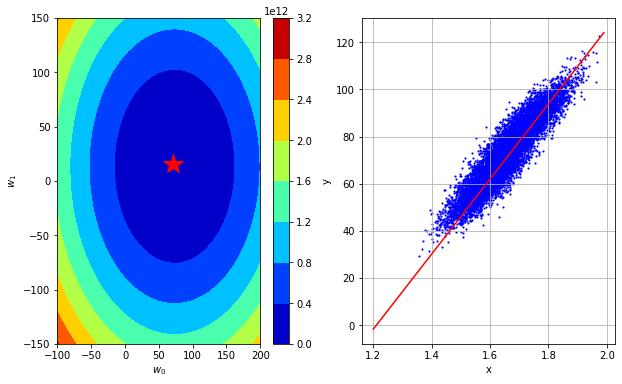

In [78]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [79]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    e = y - np.dot(tx, w.T)

    return -(np.dot(tx.T, e))/y.shape[0]


Please fill in the functions `gradient_descent` below:

In [80]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        grad = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [81]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=279223671275.91675, w0=51.30574540147369, w1=9.435798704492303
Gradient Descent(1/49): loss=26530246210.89586, w0=66.69746902191572, w1=12.266538315840002
Gradient Descent(2/49): loss=3787837955.044118, w0=71.31498610804834, w1=13.115760199244331
Gradient Descent(3/49): loss=1741021212.017447, w0=72.70024123388814, w1=13.37052676426563
Gradient Descent(4/49): loss=1556807705.1450458, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=1540228489.5265296, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=1538736360.120863, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=1538602068.474353, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=1538589982.2261674, w0=73.29247935783843, w1=13.47944711380919
Gradient Descent(9/49): loss=1538588894.4638305, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=1538588796.56522, w0=73.29379216412119, w1=13.479

In [82]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure>

# 4 Stochastic gradient descent

In [83]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    e = y - np.dot(tx, w.T)

    return -(np.dot(tx.T, e))/y.shape[0]


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    for batch_y, batch_tx in batch_iter(y, tx, batch_size, num_batches=max_iters):
        loss = compute_loss(batch_y, batch_tx, w)
        grad = compute_gradient(batch_y, batch_tx, w)
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)

    return losses, ws
    

In [84]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.002 seconds


In [85]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure>

# 5 Effect of Outliers

### Exercise 5


In [87]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

SGD: execution time=0.001 seconds


interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure>

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [89]:
def compute_loss(y, tx, w):
  return  np.sum(np.abs(y - np.dot(tx, np.transpose(w)))) / 2 * tx.shape[0]

In [90]:
def compute_sub_gradient(y, tx, w):
  loss = compute_loss(y, tx, w)
  if loss > 0:
    return 1
  elif loss < 0:
    return -1
  else:
    return 0

In [91]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):

        loss = compute_loss(y, tx, w)
        grad = compute_gradient(y, tx, w)
      
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [92]:

from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=1511131.3750522078, w0=51.847464098448484, w1=7.724426406192441
Gradient Descent(1/49): loss=453339.41251566185, w0=67.401703327983, w1=10.041754328050121
Gradient Descent(2/49): loss=174246.88071695183, w0=72.06797509684336, w1=10.736952704607413
Gradient Descent(3/49): loss=140872.3083396625, w0=73.46785662750146, w1=10.945512217574594
Gradient Descent(4/49): loss=136177.42764368813, w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/49): loss=135567.51182185207, w0=74.01381042445813, w1=11.026850427631796
Gradient Descent(6/49): loss=135451.275268359, w0=74.05160722578589, w1=11.03248153448191
Gradient Descent(7/49): loss=135424.45530377753, w0=74.06294626618423, w1=11.034170866536943
Gradient Descent(8/49): loss=135418.34417994376, w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/49): loss=135416.59895338496, w0=74.06736849193958, w1=11.034829706038407
Gradient Descent(10/49): loss=135416.07538541738, w0=74.06767464603033, w1=11

In [93]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure>